In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import pylab

In [44]:
# Load up codebook
pc = pd.DataFrame.from_csv('cap-data/recs2009_public_codebook_simple.csv', index_col= None, encoding = 'utf-8')
len(pc)

934

In [45]:
# Imputations are the EIA's guesses at filling in blank forms. Since blanks are few, imputation will be ignored.
pc = pc[pc['Variable Description'].str.contains('Imputation flag for') == False]
len(pc)

572

In [46]:
# Remove any variables that have keyword "usage" because this requires historical knowledge which is not 
# eaily obtained information. 
pc = pc[pc['Variable Description'].str.contains('usage') == False]
len(pc)

504

In [5]:
# Remove variable names with "period" because these are responses the gauge a testing period for the survey
pc = pc[pc['Variable Name'].str.contains('PERIOD') == False]
len(pc)

499

In [6]:
# Remove variable names containing "scale" becuase this was also information concerning survey process
pc = pc[pc['Variable Name'].str.contains('SCALE') == False]
len(pc)

494

In [7]:
# Remove variables with units "Thousand BTU", "Kilowatt-hours", "Hundred cubic feet of natural gas", 
# "Gallons of propane/LPG", "Gallons of fuel oil", and "Dollars" because these too are historical data
pc = pc[pc['Response Labels'].str.contains('Thousand BTU') == False]
pc = pc[pc['Response Labels'].str.contains('Kilowatt-hours') == False]
pc = pc[pc['Response Labels'].str.contains('Hundred cubic feet of natural gas') == False]
pc = pc[pc['Response Labels'].str.contains('Gallons of propane/LPG') == False]
pc = pc[pc['Response Labels'].str.contains('Gallons of fuel oil') == False]
pc = pc[pc['Response Labels'].str.contains('Dollars') == False]
len(pc)

466

In [8]:
# Remove variables regarding the actual survey and DOEID and NWEIGHT
pc = pc[pc['Variable Description'].str.contains('Energy Supplier Survey') == False]
pc = pc[pc['Variable Name'].str.contains('DOEID') == False]
pc = pc[pc['Variable Name'].str.contains('NWEIGHT') == False]
len(pc)

462

In [9]:
# Separate response codes and labels
pc['Response Codes']=[x.split('\r') if type(x) == str else x for x in pc['Response Codes']]
pc['Response Labels']=[x.split('\r') if type(x) == str else x for x in pc['Response Labels']]

In [10]:
# Some Variable names in the public codebook have spaces. This is an issue later, so let's clean that up
pc['Variable Name'] = pc['Variable Name'].str.strip()

In [11]:
# Separate numeric responses
pcnum = pc[pc['Response Codes'].isnull() == True]
pccat = pc[pc['Response Codes'].isnull() == False]

In [12]:
len(pcnum)

10

In [13]:
# Load up data
fulldata = pd.DataFrame.from_csv('cap-data/recs2009_public.csv', index_col = None, encoding = 'utf-8')

In [14]:
# Extract target variable that is "Total Site Electricity usage, in kilowatt-hours, 2009" with variable name KWH
target = fulldata.KWH

# Save NWEIGHT
lnweight = fulldata.NWEIGHT

In [15]:
# Now remove variable columns deemed unnecessary from wrangling codebook
data = pd.DataFrame()
for varname in pc['Variable Name']:
    data[varname] = fulldata[varname]


In [16]:
pcnum

,Variable Name,Variable Description,Response Codes,Response Labels,Electricity,Natural Gas,Propane,Fuel Oil,Kerosene
6,HDD65,"Heating degree days in 2009, base temperature 65F",NaN,"[Heating degree days in 2009, base temperature...","SPH_B, WTH_A",SPH_B,"SPH_B, OTH_B","SPH_B, OTH_B","SPH_B, OTH_B"
7,CDD65,"Cooling degree days in 2009, base temperature 65F",NaN,"[Cooling degree days in 2009, base temperature...",COL_B,NaN,NaN,NaN,NaN
8,HDD30YR,"Heating degree days, 30-year average 1981-2010...",NaN,"[Heating degree days, 30-year average 1981-201...",NaN,NaN,NaN,NaN,NaN
9,CDD30YR,"Cooling degree days, 30-year average 1981-2010...",NaN,"[Cooling degree days, 30-year average 1981-201...",NaN,NaN,NaN,NaN,NaN
827,TOTSQFT,Total square footage (includes all attached ga...,NaN,[Square Feet],NaN,NaN,NaN,NaN,NaN
828,TOTSQFT_EN,Total square footage (includes heated/cooled g...,NaN,[Square Feet],OTH_B,NaN,NaN,NaN,NaN
829,TOTHSQFT,Total heated square footage,NaN,[Square Feet],SPH_B,SPH_B,"SPH_B, OTH_B","SPH_B, OTH_B","SPH_B, WTH_B, OTH_B"
830,TOTUSQFT,Total unheated square footage,NaN,[Square Feet],NaN,NaN,NaN,NaN,NaN
831,TOTCSQFT,Total cooled square footage,NaN,[Square Feet],NaN,NaN,NaN,NaN,NaN
832,TOTUCSQFT,Total uncooled square footage,NaN,[Square Feet],COL_B,NaN,NaN,NaN,NaN


In [17]:
# This section calculates the R-val when a line is fitted to a plot of kwh vs remaining numerical data

i = 0
y = target
r_vals = pd.DataFrame(columns = ["variable", "rval","abs_rval","variable_description"])
for i in np.arange(len(pcnum)):
    x = data[pcnum['Variable Name'].iloc[i]]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    r_vals.loc[len(r_vals)] = [pcnum['Variable Name'].iloc[i], r_value, abs(r_value), pcnum['Variable Description'].iloc[i]]

r_vals.sort_values(by = 'abs_rval', ascending=False)

,variable,rval,abs_rval,variable_description
8,TOTCSQFT,0.484042,0.484042,Total cooled square footage
6,TOTHSQFT,0.410385,0.410385,Total heated square footage
4,TOTSQFT,0.385918,0.385918,Total square footage (includes all attached ga...
5,TOTSQFT_EN,0.379344,0.379344,Total square footage (includes heated/cooled g...
3,CDD30YR,0.256460,0.256460,"Cooling degree days, 30-year average 1981-2010..."
1,CDD65,0.245715,0.245715,"Cooling degree days in 2009, base temperature 65F"
2,HDD30YR,-0.137098,0.137098,"Heating degree days, 30-year average 1981-2010..."
0,HDD65,-0.130570,0.130570,"Heating degree days in 2009, base temperature 65F"
7,TOTUSQFT,0.100724,0.100724,Total unheated square footage
9,TOTUCSQFT,-0.031329,0.031329,Total uncooled square footage


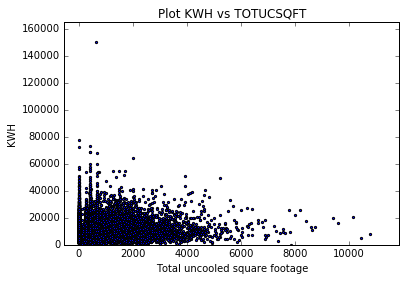

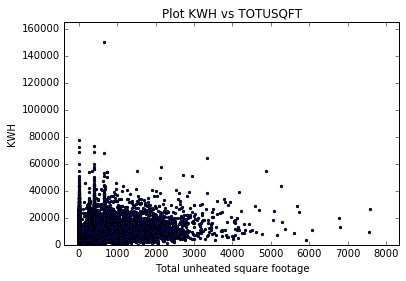

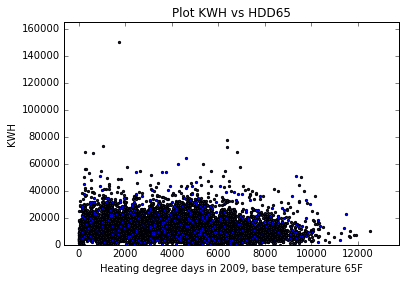

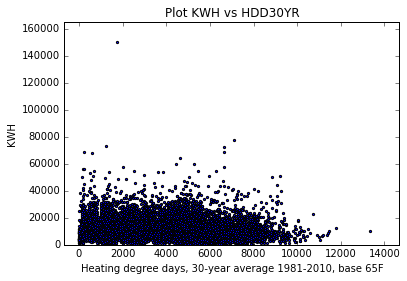

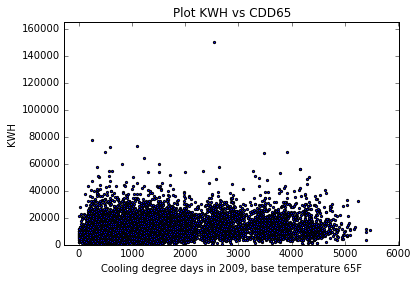

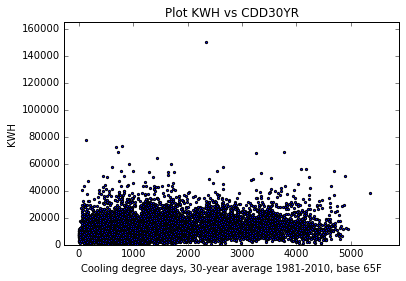

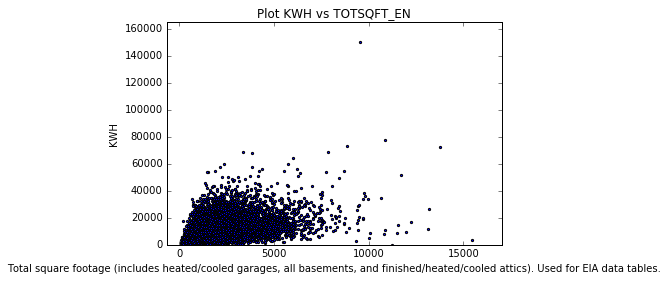

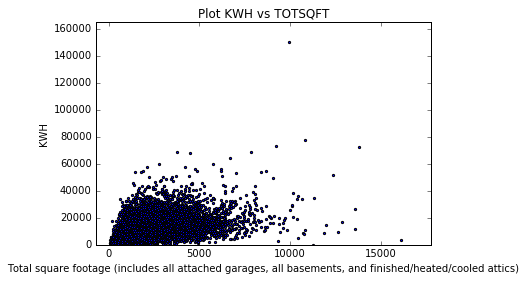

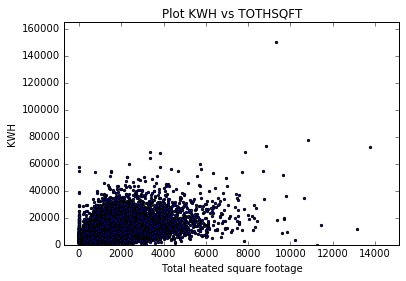

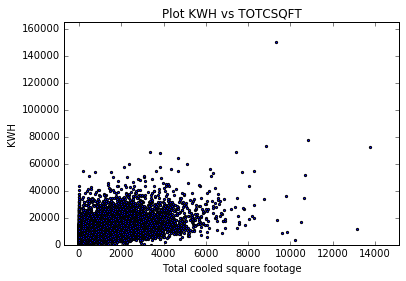

In [18]:
# This section plots the numerical variables against KWH
r_vals = r_vals.sort_values(by = 'abs_rval')
ymax = max(y) + 0.1*max(y)
ymin = 0
i = 0
for var in r_vals.variable:
    x = data[var]
    plt.scatter(x,y, marker = ".")
    plt.title("Plot KWH vs " + var)# + ': ' + topr.variable_description.iloc[i])
    plt.xlim([min(x)-0.05*max(x),max(x)+0.1*max(x)])
    plt.ylim([ymin,ymax])
    plt.ylabel('KWH')
    plt.xlabel(r_vals.variable_description.iloc[i])
    plt.show()
    i += 1

### Examine categorical data

In [19]:
pccat

,Variable Name,Variable Description,Response Codes,Response Labels,Electricity,Natural Gas,Propane,Fuel Oil,Kerosene
1,REGIONC,Census Region,"[1, 2, 3, 4]","[Northeast Census Region, Midwest Census Regio...",NaN,NaN,NaN,NaN,NaN
2,DIVISION,Census Division,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[New England Census Division (CT, MA, ME, NH, ...",NaN,NaN,NaN,NaN,NaN
3,REPORTABLE_DOMAIN,Reportable states and groups of states,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[, Connecticut, Maine, New Hampshire, Rhode Is...",NaN,NaN,NaN,NaN,NaN
4,TYPEHUQ,Type of housing unit,"[1, 2, 3, 4, 5]","[Mobile Home, Single-Family Detached, Single-F...",OTH_B,SPH_A,NaN,NaN,NaN
10,Climate_Region_Pub,Building America Climate Region (collapsed for...,"[1, 2, 3, 4, 5]","[Very Cold/Cold, Hot-Dry/Mixed-Dry, Hot-Humid,...",NaN,NaN,NaN,NaN,NaN
11,AIA_Zone,"AIA Climate Zone, based on average temperature...","[1, 2, 3, 4, 5]","[Less than 2,000 CDD and greater than 7,000 HD...",SPH_A,SPH_A,NaN,NaN,NaN
12,METROMICRO,Housing unit in Census Metropolitan Statistica...,"[METRO, MICRO, NONE]",[Housing unit in Census Metropolitan Statistic...,NaN,NaN,NaN,NaN,NaN
13,UR,Housing unit classified as urban or rural by C...,"[U, R]","[Urban, Rural]",NaN,NaN,NaN,NaN,NaN
14,KOWNRENT,"Housing unit is owned, rented, or occupied wit...","[1, 2, 3]","[Owned by someone in the household, Rented, Oc...",NaN,NaN,NaN,NaN,NaN
15,CONDCOOP,Housing unit part of condominium or cooperative,"[1, 2, -2]","[Condominium, Cooperative, Not Applicable]",NaN,NaN,NaN,NaN,NaN


In [20]:
def valerr(x): 
    try:
        if int(x):  
            return 'clean'
    except ValueError:
        return 'not clean'
    else:
        return 'clean'

In [21]:
# This section converts categorical data into numerical lists or sorts out variables that need further cleaning

pccat_clean = pd.DataFrame(columns = pccat.columns)
pccat_unclean = pd.DataFrame(columns = pccat.columns)
i = 0
for idx,val in enumerate(pccat['Response Codes']):
    if valerr(val[0]) == 'clean':
        val=[int(x) for x in val]
        pccat_clean.loc[len(pccat_clean)] = pccat.iloc[idx]
    elif valerr(val[0]) == 'not clean':
        pccat_unclean.loc[len(pccat_unclean)] = pccat.iloc[idx]

# Convert list responses from string to numeric
for i in np.arange(len(pccat_clean)):
    pccat_clean['Response Codes'][i] = [int(x) for x in pccat_clean['Response Codes'][i]]
        

In [22]:
print(len(pccat_clean))
print(len(pccat_unclean))
print(len(pccat))

401
51
452


In [47]:
pccat_clean

,Variable Name,Variable Description,Response Codes,Response Labels,Electricity,Natural Gas,Propane,Fuel Oil,Kerosene
0,REGIONC,Census Region,"[1, 2, 3, 4]","[Northeast Census Region, Midwest Census Regio...",NaN,NaN,NaN,NaN,NaN
1,DIVISION,Census Division,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[New England Census Division (CT, MA, ME, NH, ...",NaN,NaN,NaN,NaN,NaN
2,REPORTABLE_DOMAIN,Reportable states and groups of states,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[, Connecticut, Maine, New Hampshire, Rhode Is...",NaN,NaN,NaN,NaN,NaN
3,TYPEHUQ,Type of housing unit,"[1, 2, 3, 4, 5]","[Mobile Home, Single-Family Detached, Single-F...",OTH_B,SPH_A,NaN,NaN,NaN
4,Climate_Region_Pub,Building America Climate Region (collapsed for...,"[1, 2, 3, 4, 5]","[Very Cold/Cold, Hot-Dry/Mixed-Dry, Hot-Humid,...",NaN,NaN,NaN,NaN,NaN
5,AIA_Zone,"AIA Climate Zone, based on average temperature...","[1, 2, 3, 4, 5]","[Less than 2,000 CDD and greater than 7,000 HD...",SPH_A,SPH_A,NaN,NaN,NaN
6,KOWNRENT,"Housing unit is owned, rented, or occupied wit...","[1, 2, 3]","[Owned by someone in the household, Rented, Oc...",NaN,NaN,NaN,NaN,NaN
7,CONDCOOP,Housing unit part of condominium or cooperative,"[1, 2, -2]","[Condominium, Cooperative, Not Applicable]",NaN,NaN,NaN,NaN,NaN
8,YEARMADERANGE,Year range when housing unit was built,"[1, 2, 3, 4, 5, 6, 7, 8]","[Before 1950, 1950 to 1959, 1960 to 1969, 1970...",NaN,SPH_A,SPH_A,SPH_A,NaN
9,OCCUPYYRANGE,Year range when household moved in,"[1, 2, 3, 4, 5, 6, 7, 8]","[Before 1950, 1950 to 1959, 1960 to 1969, 1970...",NaN,NaN,NaN,NaN,NaN


In [23]:
pccat_unclean

,Variable Name,Variable Description,Response Codes,Response Labels,Electricity,Natural Gas,Propane,Fuel Oil,Kerosene
0,METROMICRO,Housing unit in Census Metropolitan Statistica...,"[METRO, MICRO, NONE]",[Housing unit in Census Metropolitan Statistic...,NaN,NaN,NaN,NaN,NaN
1,UR,Housing unit classified as urban or rural by C...,"[U, R]","[Urban, Rural]",NaN,NaN,NaN,NaN,NaN
2,YEARMADE,Year housing unit was built,[1600 - 2009],[Year housing unit was built],NaN,NaN,NaN,NaN,NaN
3,NUMFLRS,Number of floors in a 5+ unit apartment building,"[1 - 99, -2]","[Number of floors, Not Applicable]",NaN,NaN,NaN,NaN,NaN
4,NUMAPTS,Number of apartment units in a 5+ unit apartme...,"[5 - 995, -2]","[Number of apartment units, Not Applicable]",NaN,NaN,NaN,NaN,NaN
5,NAPTFLRS,Number of floors in an apartment (Number of le...,"[1 - 9, -2]","[Number of floors in apartment, Not Applicable]",NaN,NaN,NaN,NaN,NaN
6,BEDROOMS,Number of bedrooms,"[0 - 20, -2]","[Number of bedrooms, Not Applicable]",NaN,NaN,NaN,NaN,NaN
7,NCOMBATH,Number of full bathrooms,[0 - 9],[Number of full bathrooms],NaN,NaN,NaN,NaN,NaN
8,NHAFBATH,Number of half bathrooms,[0 - 9],[Number of half bathrooms],NaN,NaN,NaN,NaN,NaN
9,OTHROOMS,Number of rooms other than bedroom(s) and bath...,[1 - 20],[Number of other rooms],NaN,NaN,NaN,NaN,NaN


### Too many categorical variables! Run a hypothesis test to pare down variables

In [24]:
pccat_clean

,Variable Name,Variable Description,Response Codes,Response Labels,Electricity,Natural Gas,Propane,Fuel Oil,Kerosene
0,REGIONC,Census Region,"[1, 2, 3, 4]","[Northeast Census Region, Midwest Census Regio...",NaN,NaN,NaN,NaN,NaN
1,DIVISION,Census Division,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[New England Census Division (CT, MA, ME, NH, ...",NaN,NaN,NaN,NaN,NaN
2,REPORTABLE_DOMAIN,Reportable states and groups of states,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[, Connecticut, Maine, New Hampshire, Rhode Is...",NaN,NaN,NaN,NaN,NaN
3,TYPEHUQ,Type of housing unit,"[1, 2, 3, 4, 5]","[Mobile Home, Single-Family Detached, Single-F...",OTH_B,SPH_A,NaN,NaN,NaN
4,Climate_Region_Pub,Building America Climate Region (collapsed for...,"[1, 2, 3, 4, 5]","[Very Cold/Cold, Hot-Dry/Mixed-Dry, Hot-Humid,...",NaN,NaN,NaN,NaN,NaN
5,AIA_Zone,"AIA Climate Zone, based on average temperature...","[1, 2, 3, 4, 5]","[Less than 2,000 CDD and greater than 7,000 HD...",SPH_A,SPH_A,NaN,NaN,NaN
6,KOWNRENT,"Housing unit is owned, rented, or occupied wit...","[1, 2, 3]","[Owned by someone in the household, Rented, Oc...",NaN,NaN,NaN,NaN,NaN
7,CONDCOOP,Housing unit part of condominium or cooperative,"[1, 2, -2]","[Condominium, Cooperative, Not Applicable]",NaN,NaN,NaN,NaN,NaN
8,YEARMADERANGE,Year range when housing unit was built,"[1, 2, 3, 4, 5, 6, 7, 8]","[Before 1950, 1950 to 1959, 1960 to 1969, 1970...",NaN,SPH_A,SPH_A,SPH_A,NaN
9,OCCUPYYRANGE,Year range when household moved in,"[1, 2, 3, 4, 5, 6, 7, 8]","[Before 1950, 1950 to 1959, 1960 to 1969, 1970...",NaN,NaN,NaN,NaN,NaN


In [25]:
lnweight.describe()

count    12083.000000
mean      9402.981793
std       5192.101471
min        476.099768
25%       6297.038285
50%       7970.631945
75%      11330.027540
max      95779.144570
Name: NWEIGHT, dtype: float64

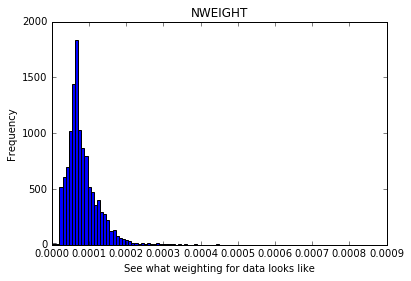

In [26]:
#Examine the weights of data
lnweight = lnweight/ sum(lnweight)
plt.hist(lnweight, bins = 100)
plt.title("NWEIGHT")
plt.xlabel("See what weighting for data looks like")
plt.ylabel("Frequency")
plt.show()

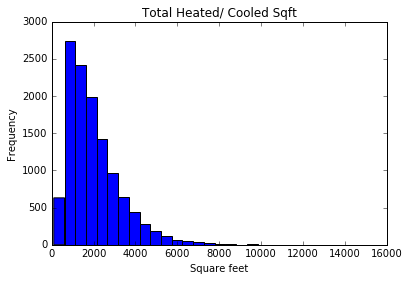

In [27]:
#Examine the square footage of data
plt.hist(data.TOTSQFT_EN, bins = 30)
plt.title("Total Heated/ Cooled Sqft")
plt.xlabel("Square feet")
plt.ylabel("Frequency")
plt.show()

In [28]:
# Game plan: make a prediction model with just baseline linear regression then attempt to use PCA for dimension reduction

In [29]:
# Make new csv files to use in subsequent notebooks

In [30]:
# kwh = pd.DataFrame(columns = ['KWH'])
# nweight = pd.DataFrame(columns = ['NWEIGHT'])

In [31]:
# kwh.KWH = target
# nweight.NWEIGHT = lnweight

In [32]:
# kwh.to_csv('kwh.csv')

In [33]:
# data.to_csv('data_v2.csv')

In [34]:
# pc.to_csv('pc_v2.csv')

In [35]:
# nweight.to_csv('nweight.csv')

In [36]:
# pccat_clean.to_csv('pc_cat_vars.csv')